In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
data = pd.read_csv('Datasets/Social_Network_Ads.csv')
print(data.head())


    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [4]:
# Step 1: Features (Age, EstimatedSalary), Target (Purchased)
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']


In [5]:
 #Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
# Step 3: Feature Scaling (KNN is distance-based, so scaling is important)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Step 4: Apply KNN
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  # Euclidean distance
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
# Step 5: Predictions
y_pred = knn.predict(X_test)

In [10]:
# Step 6: Evaluation Metrics
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)


print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)


Confusion Matrix:
 [[59  4]
 [ 3 34]]
Accuracy: 0.93
Error Rate: 0.06999999999999995
Precision: 0.8947368421052632
Recall: 0.918918918918919


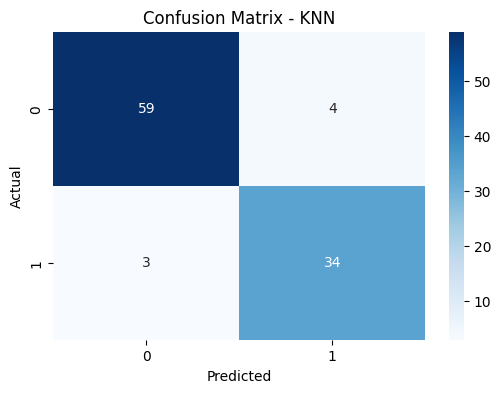

In [11]:
# Step 7: Visualization of Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()